# 04 Visual check of the tissues

- Simply load all the tissues
- Project the scans to 2D images across the X,Y,Z axes
- Arrange them in a aesthetic color scheme

- Diagnostic figs to be stored in `dst` path

<img src="https://www.egr.msu.edu/~amezqui3/citrus/figs/citrus_diagnostic.gif" width=500>

In [2]:
import os
import sys
import glob
import argparse

from matplotlib import pyplot as plt
import scipy.ndimage as ndimage
import numpy as np

import tifffile as tf
import citrus_utils as vitaminC
from importlib import reload

In [3]:
src = '../data/comps/'
img_files = sorted(glob.glob(src+'*.tif'))
img_file = img_files[0]


_ , fname = os.path.split(img_file)
bname = os.path.splitext(fname)[0]

init_dst = '../data/tissue/'

img_files

['../data/comps/WR05_CRC3605_18B-19-5_L03.tif',
 '../data/comps/WR18_CRC2863_12A-39-9_L04.tif']

In [4]:
rname = '_'.join(bname.split('_')[:-1])
lname = bname.split('_')[-1]
dst = init_dst + rname + '/' + lname + '/'
dst

'../data/tissue/WR05_CRC3605_18B-19-5/L03/'

In [5]:
#img = tf.imread(img_file)
rind = tf.imread(dst + bname + '_rind.tif')
#meso = tf.imread(dst + bname + '_mesocarp.tif')
endo = tf.imread(dst + bname + '_endocarp.tif')
exo = tf.imread(dst + bname + '_exocarp.tif')
spine = tf.imread(dst + bname + '_spine.tif')

- Recall that the mesocarp is simply the rind minus the central spine
- We stored the rind but not the mesocarp, so we have to recompute it

In [6]:
bin_spine = spine.copy()
bin_spine[bin_spine > 0] = 1
meso = rind*(1-bin_spine)
tendo = vitaminC.get_largest_element(meso)
meso *= tendo

393 components
[5502226    4214    2209    1993    1748    1388    1097    1001     945
     819     678     668     519     429     307     289     229     226
     225     221]


In [7]:
meso_snaps = vitaminC.collapse_dimensions(meso)
endo_snaps = vitaminC.collapse_dimensions(endo)
exo_snaps = vitaminC.collapse_dimensions(exo)
spine_snaps = vitaminC.collapse_dimensions(spine)

In [8]:
def citrus_diagnostic_viz(tissues, tnames, pnames, bname, facecolor=None, writefig=False, dst='./'):
    fig, ax = plt.subplots(3,len(tissues),figsize=(18,15), facecolor=facecolor)
    
    for i in range(3):
        for j in range(len(tissues)):
            ax[i,j].imshow(tissues[j][i], cmap='inferno', origin='lower')
    
    if facecolor != 'black':
        for j in range(len(tissues)):
            ax[-1,j].set_xlabel(tnames[j], fontsize=20)
        for i in range(len(pnames)):
            ax[i,0].set_ylabel(pnames[i], fontsize=20)
        plt.suptitle(bname, fontsize=35);
        filename = dst + bname + '_diagnostic_panel.jpg'
    else:
        for i in range(3):
            for j in range(len(tissues)):
                ax[i,j].axis('off')
        plt.suptitle(bname, fontsize=35, color='white');
        filename = dst + 'black_' + bname + '_diagnostic_panel.jpg'
    plt.tight_layout();
    
    if writefig:
        plt.savefig(filename, dpi=96, format='jpg', pil_kwargs={'optimize':True}, bbox_inches='tight');
        plt.close();

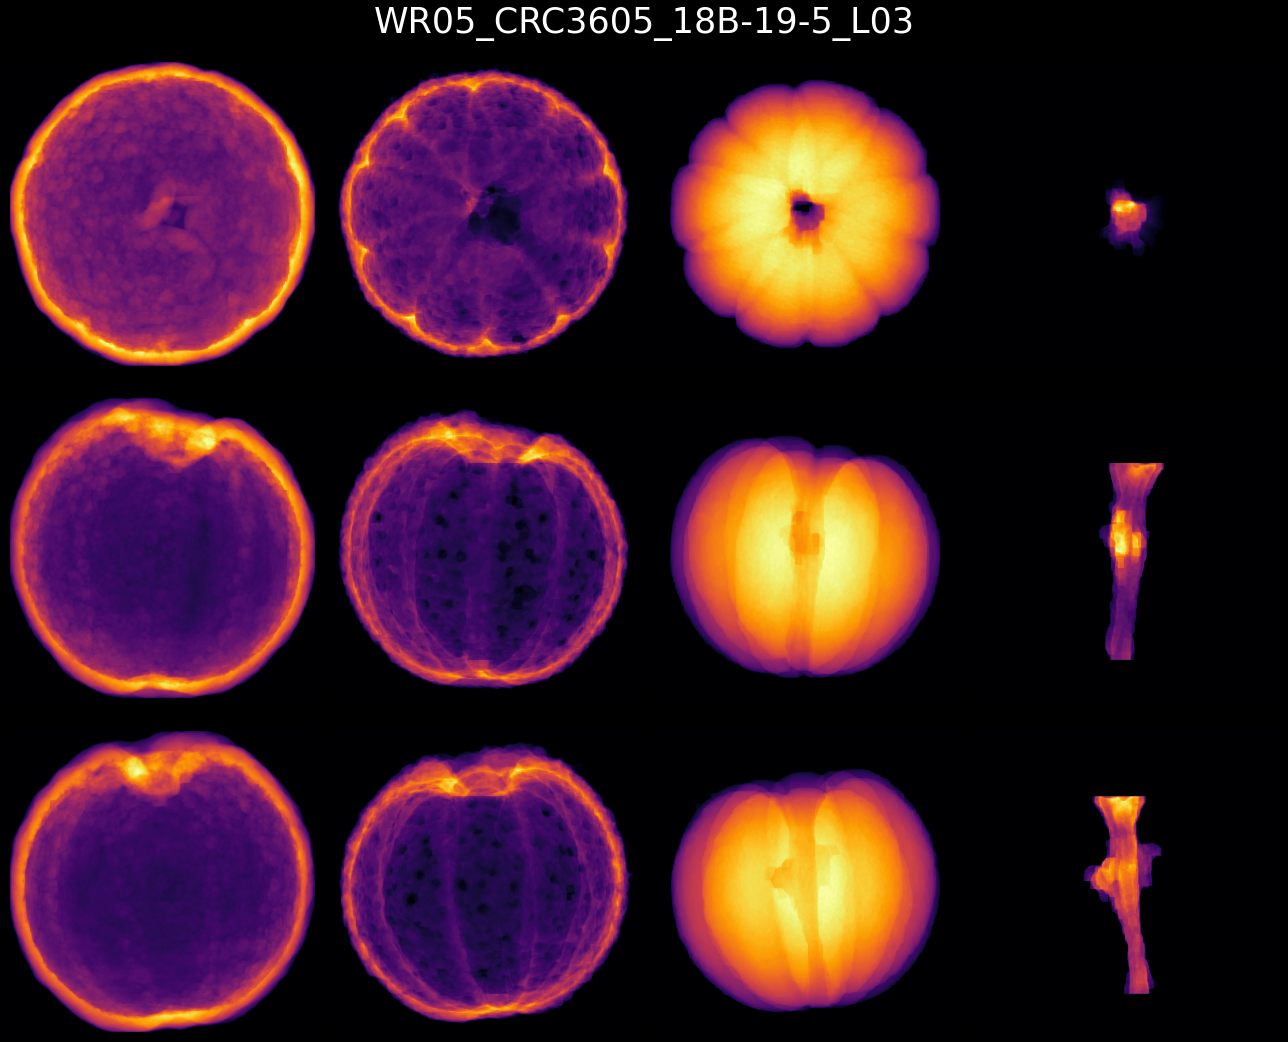

In [9]:
tissues = [exo_snaps, meso_snaps, endo_snaps, spine_snaps]
tnames = ['Exocarp', 'Mesocarp', 'Endocarp', 'Spine']
pnames = ['Transversal', 'Frontal', 'Lateral']

dst = '../data/diagnostic/'
wf = False
fc = 'black'
citrus_diagnostic_viz(tissues, tnames, pnames, bname, facecolor=fc, writefig=wf, dst=dst);